<a href="https://colab.research.google.com/github/grace1996-beep/week_6_ip/blob/main/Week6__Core_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

Defining the question

1. Predicting the results of a game between  team 1 and team 2 based on whose home and whose away .

2. including the ranking when solving the above question

**Metrics of success**

To achieve my goal defined in the above question il follow the following steps

1. loading and merging my datasets
2. checking for null values
3. checking for duplicaated values
4. checking for outliers.
5. Dropping unnecessary columns
6. renaming columns to my desired namimg.
7. performing polynomial regression.
8. performing logistic Regression.
9. Documenting my conclusions .

**Apropriateness of the data **

in this project the data provided is appropriate to work with inorder to answer my above question.

dataset to use are 

1. /content/fifa_ranking.csv

2. /content/results.**csv**


**importing necessary liblaries**

In [78]:
#importing liblaries
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import urllib #download from football data

from __future__ import division
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**importing first dataset**

In [4]:
df1=pd.read_csv("fifa_ranking.csv")
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


**cleaning first dataset**

In [5]:
df1['rank_date']=pd.to_datetime(df1['rank_date'])

**chanfing the format of date column**

In [6]:
import datetime as dt
df1['rank_date']=df1['rank_date'].dt.strftime('%Y-%m')
df1.rename(columns={'rank_date':'date'},inplace=True)

**selecting columns to be used from df1**

In [8]:
rank=df1[['rank','country_full','date']]
rank.head()

,rank,country_full,date
0,1,Germany,1993-08
1,2,Italy,1993-08
2,3,Switzerland,1993-08
3,4,Sweden,1993-08
4,5,Argentina,1993-08


**Loading the secoond dataset**

In [9]:
#loading results csv
df2=pd.read_csv("results.csv")
df2.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


**checking for duplicated values and dropping them**

In [11]:
print(df2.duplicated().sum())
scores=df2.drop_duplicates()
print(scores.duplicated().sum())

0
0


**changing the date format**

In [14]:
scores['date']=pd.to_datetime(scores['date'])
scores['date']=scores['date'].dt.strftime('%Y-%m')
scores.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03,England,Scotland,4,2,Friendly,London,England,False
2,1874-03,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03,England,Scotland,2,2,Friendly,London,England,False
4,1876-03,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [19]:
#after dropping city,country and neutral columns
scores.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly
3,1875-03,England,Scotland,2,2,Friendly
4,1876-03,Scotland,England,3,0,Friendly


**Merging the scores and rank dataset **

In [20]:
df_merge=pd.merge(scores,rank,how='inner',right_on=['date','country_full'],left_on=['date','home_team'])
df_merge

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,Colombia
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,Colombia
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,Colombia
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,Peru
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,Peru
...,...,...,...,...,...,...,...,...
8566,2006-05,Spain,Russia,0,0,Friendly,5,Spain
8567,2006-05,Croatia,Iran,2,2,Friendly,23,Croatia
8568,2006-05,Argentina,Angola,2,0,Friendly,9,Argentina
8569,2006-05,England,Hungary,3,1,Friendly,10,England


**renaming the columns**

In [21]:
df_merge.rename(columns={'rank':'hometeam_rank'},inplace=True)


**creating the final data after merging**

In [23]:
final=pd.merge(df_merge,rank,how='inner',right_on=['date','country_full'],left_on=['date','away_team'])
final.head()

,date,home_team,away_team,home_score,away_score,tournament,hometeam_rank,country_full_x,rank,country_full_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,Colombia,67,Paraguay
1,1993-08,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,Argentina,67,Paraguay
2,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,Colombia,5,Argentina
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,Peru,5,Argentina
4,1993-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,Paraguay,5,Argentina


**renaming rank column and dropping columns**

In [26]:
final.rename(columns={'rank':'awayteam_rank'},inplace=True)
final.drop(['country_full_x','country_full_y'],axis=1,inplace=True)
#after dropping country_full_y and country_full_x columns
final.head()

,date,home_team,away_team,home_score,away_score,tournament,hometeam_rank,awayteam_rank
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,67
2,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [27]:
final.shape

(7722, 8)

**External source validation**



i compared my data with this data https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now and found that my data was okay to work with. my data has the best amount of columns to work with.

**Polynomial regression**

**Checking for correlation between the variables**

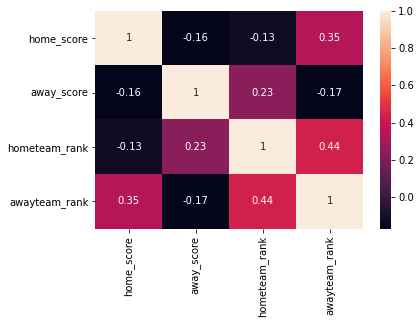

In [28]:
sns.heatmap(final.corr(),annot=True)
plt.show()

**Creating X and y**

In [87]:
X = final['home_score'].values.reshape(-1,1)
y=final['hometeam_rank'].values
print(X)
print(y)

[[0]
 [0]
 [2]
 ...
 [2]
 [2]
 [1]]
[19  5 19 ...  8 19  3]


**Splitting the dataset to train and  test dataset**

In [88]:
#splitting the dataset into training and test dataset
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualizing linear and polynomial regression results**

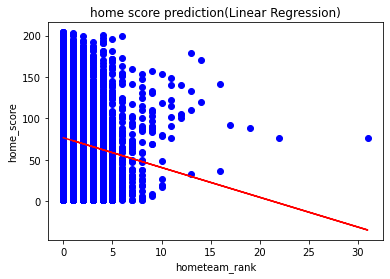

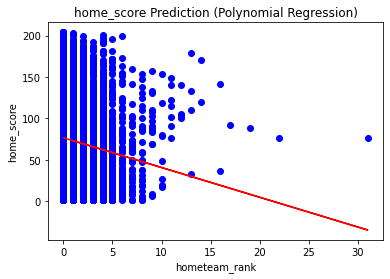

In [104]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('home score prediction(Linear Regression)')
plt.xlabel('hometeam_rank')
plt.ylabel('home_score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 1) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home_score Prediction (Polynomial Regression)')
plt.xlabel('hometeam_rank')
plt.ylabel('home_score')
plt.show()

**Increasing the degrees to 8**

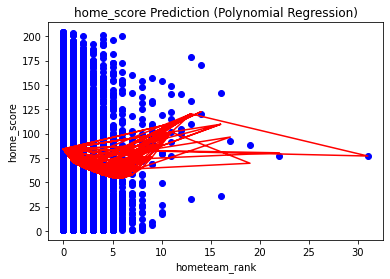

In [106]:
#incresig degree to 8 
poly_reg8 = PolynomialFeatures(degree = 8) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home_score Prediction (Polynomial Regression)')
plt.xlabel('hometeam_rank')
plt.ylabel('home_score')
plt.show()

Obsevartion

I can conclude that this is a pretty good model because it passes just about the right amoung of points and also the distance from the curve to the points that it 

does not pass through is at a minimum. Hence, I can use this model to make our predictions. 

Making Predictions

The final step is use the model I created to make the  desired prediction.

To check how accurate polynomial regression is, I going to predict the Home_score using both linear regression and polynomial regression

performing calculations 

if a score of 1 has a rank of 67 lets predict the score of 1 using the below code

**Predicting using linear and polynomial regression**

In [116]:
# Predict using linear regression
lin_pred = reg_line.predict([[2]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg8.fit_transform([[2]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg8.fit_transform(X))

Linear prediction: 69
Polynomial prediction: 65


**conclusion**

The linear score prediction is not  close to 67 as compared to our polynomial score which is 71 close to 67 .

this means my model is working perfectly. 

**making predictions of away score goals**

**Creating x and y **

In [124]:
X = final['away_score'].values.reshape(-1,1)
y=final['awayteam_rank'].values
print(X)
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [2]
 [0]]
[67 67  5 ... 11 18 15]


**splitting the dataset**

In [125]:
#splitting the dataset into training and test dataset
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Making visualizations**

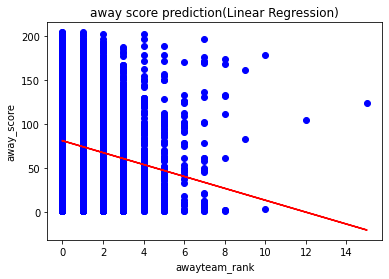

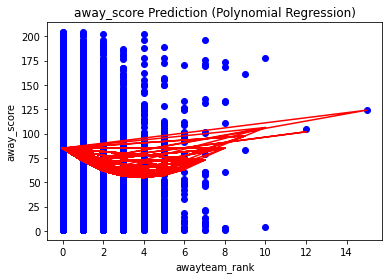

In [127]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('away score prediction(Linear Regression)')
plt.xlabel('awayteam_rank')
plt.ylabel('away_score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 8) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away_score Prediction (Polynomial Regression)')
plt.xlabel('awayteam_rank')
plt.ylabel('away_score')
plt.show()

my polynomial regression is working perfectly because  the line is now passing through the points although the points are so much scatred.

**Predicting linear and polynomial regression**

In [129]:
# Predict using linear regression
lin_pred = reg_line.predict([[0]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[0]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Linear prediction: 81
Polynomial prediction: 85


**Conclusion**

in conclusion my model is woorking perfectly.

**logistic regression**


**splitting the dataset**

In [149]:
# Splitting our dataset
#
X = final['hometeam_rank'].values.reshape(-1,1)
y = final['home_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

**Fitting our model**

In [150]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Using model to make predictions**

In [151]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

**Evaluating the model**

In [152]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[160, 450,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [116, 529,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 67, 439,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 37, 245,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 12, 136,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 10,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  3,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  2,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  2,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   0,   0,   

**Conclusion**

The results from the confusion matrix tell us that 160,67,37,12,10,3,1 are the number of correct predictions. 

our model is able to predict the scores as well home and away score rank meaning that the model is working out perfectlly.







**Challenging results**

The predictions were okay but would have been much better if there were more binary numbers to perfom my logistic regression much better.